<a href="https://colab.research.google.com/github/TuxvGylgina/DE_Sprint/blob/main/practica%201.6/zadanie_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import math
import missingno as msno
plt.rcParams['figure.dpi'] = 140

# Подготовка к работе с графиками

Загрузим файл, прочитаем

In [ ]:
df = pd.read_csv('/content/DataEngineer.csv')

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


Переименуем столбцы

In [ ]:
df.rename(columns = {'Job Title':'Вакансия', 
'Salary Estimate':'Зарплата', 
'Job Description':'Описание работы', 
'Rating':'Рейтинг', 
'Company Name':'Имя компании', 
'Location':'Локация', 
'Headquarters':'Локация Штаб квартиры', 
'Size':'Размер компании', 
'Founded':'Год основания компании', 
'Type of ownership':'Тип собственности',
'Industry':'Отрасль компании',
 'Sector':'Сектор компании',
 'Revenue':'Доход компании',
'Competitors':'Конкуренты компании',
 'Easy Apply':'Льготы'}, 
inplace = True)
df.head()

,Вакансия,Зарплата,Описание работы,Рейтинг,Имя компании,Локация,Локация Штаб квартиры,Размер компании,Год основания компании,Тип собственности,Отрасль компании,Сектор компании,Доход компании,Конкуренты компании,Льготы
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


Определим, есть ли пропущенные данные

In [ ]:
print(df.isnull().sum())

Вакансия                  0
Зарплата                  0
Описание работы           0
Рейтинг                   0
Имя компании              0
Локация                   0
Локация Штаб квартиры     0
Размер компании           0
Год основания компании    0
Тип собственности         0
Отрасль компании          0
Сектор компании           0
Доход компании            0
Конкуренты компании       0
Льготы                    0
dtype: int64


пропущенных данных нет

Почистим столбец с названием компаний, уберем лишние данные

In [ ]:
df['Имя компании'] = df['Имя компании'].str.replace('\n.*','')

In [ ]:
df

,Вакансия,Зарплата,Описание работы,Рейтинг,Имя компании,Локация,Локация Штаб квартиры,Размер компании,Год основания компании,Тип собственности,Отрасль компании,Сектор компании,Доход компании,Конкуренты компании,Льготы
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


# **Анализ таблицы:**

Определим общее количество ваканций

In [ ]:
df.count()

Вакансия                  2528
Зарплата                  2528
Описание работы           2528
Рейтинг                   2528
Имя компании              2528
Локация                   2528
Локация Штаб квартиры     2528
Размер компании           2528
Год основания компании    2528
Тип собственности         2528
Отрасль компании          2528
Сектор компании           2528
Доход компании            2528
Конкуренты компании       2528
Льготы                    2528
dtype: int64

всего 2528 ваканций

Определим самые востребованные профессии Топ 20

In [ ]:
df['Вакансия'].value_counts()[:20]

Data Engineer                     469
Senior Data Engineer              103
Software Engineer                  93
Big Data Engineer                  73
Sr. Data Engineer                  35
Machine Learning Engineer          17
Data Engineer II                   16
Data Warehouse Engineer            14
Systems Engineer                   13
Data Platform Engineer             13
Azure Data Engineer                11
Senior Big Data Engineer           10
Cloud Engineer                      9
Senior Software Engineer            9
Lead Data Engineer                  8
Business Intelligence Engineer      8
Data Scientist                      8
Full Stack Engineer                 8
Software Development Engineer       8
Cloud Data Engineer                 7
Name: Вакансия, dtype: int64

Самая востребованная профессия - Data Engineer  требуется 469 специалистов

# Палитра

На основе фирменного стиля hh.ru определим световую палитру для графиков

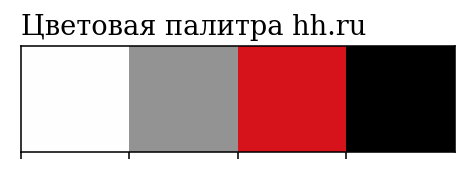

In [ ]:
# Palette
sns.palplot(['#FEFEFE', '#939393', '#D6121A','#000000'])

plt.title("Цветовая палитра hh.ru",loc='left',fontfamily='serif',fontsize=14,y=1.0)
plt.show()

# Построим график Топ 10 компаний с самым большим кол-вом вакансий 

**Таблица Топ 10**

In [ ]:
Jc = df['Имя компании'].value_counts().rename_axis('Имя компании').reset_index(name='Вакансии')[:10]

In [ ]:
Jc

,Имя компании,Вакансии
0,Amazon,28
1,Apple,18
2,Lockheed Martin,18
3,Humana,16
4,IntraEdge,16
5,Bell Helicopter,15
6,Diverse Lynx,15
7,Google,14
8,"Management Decisions, Inc.",14
9,MUFG,13


**График**

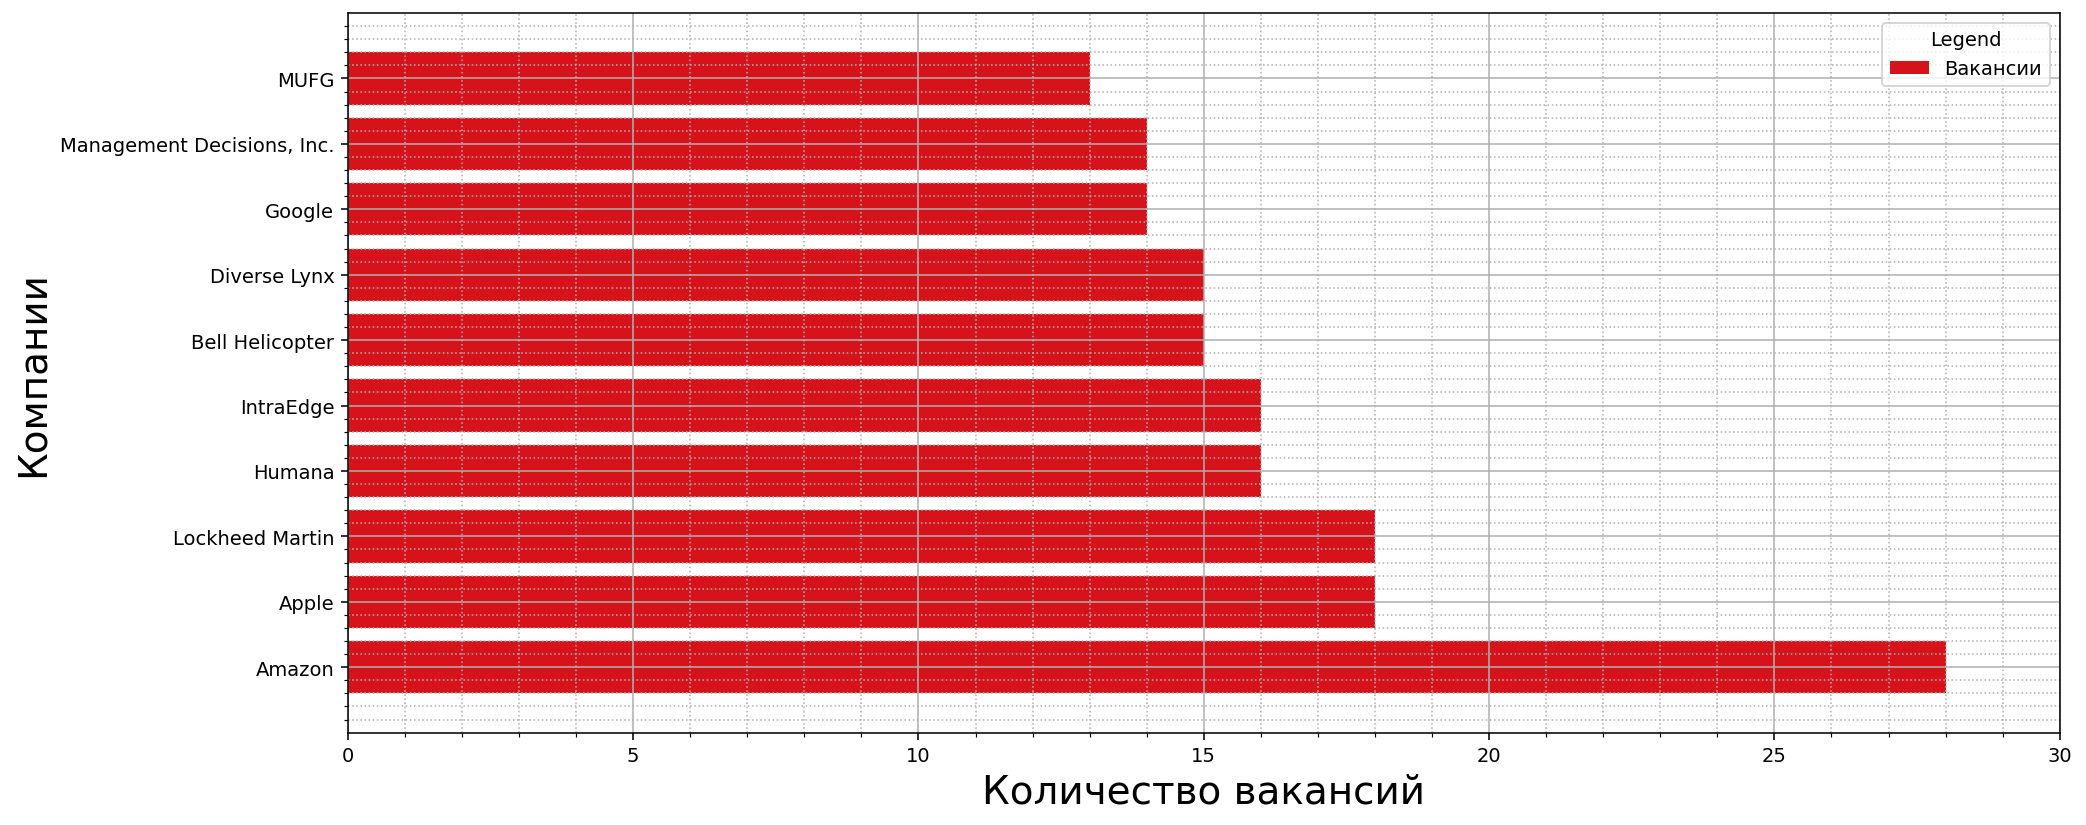

In [ ]:
plt.figure(figsize=(15,6))
plt.barh(Jc['Имя компании'],Jc['Вакансии'],color='#D6121A')

plt.xlabel('Количество вакансий',fontsize=20)
plt.ylabel('Компании',fontsize=20)

legend = plt.legend(['Вакансии'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([0., 30.])
plt.ylim([-1., 10.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()

plt.show()

# Построим график Топ 10 самых популярных названий в вакансиях

**Таблица Топ 10**

In [ ]:
Jt = df['Вакансия'].value_counts().rename_axis('Имя компании').reset_index(name='Вакансии')[:10]

In [ ]:
Jt

,Имя компании,Вакансии
0,Data Engineer,469
1,Senior Data Engineer,103
2,Software Engineer,93
3,Big Data Engineer,73
4,Sr. Data Engineer,35
5,Machine Learning Engineer,17
6,Data Engineer II,16
7,Data Warehouse Engineer,14
8,Systems Engineer,13
9,Data Platform Engineer,13


**График**

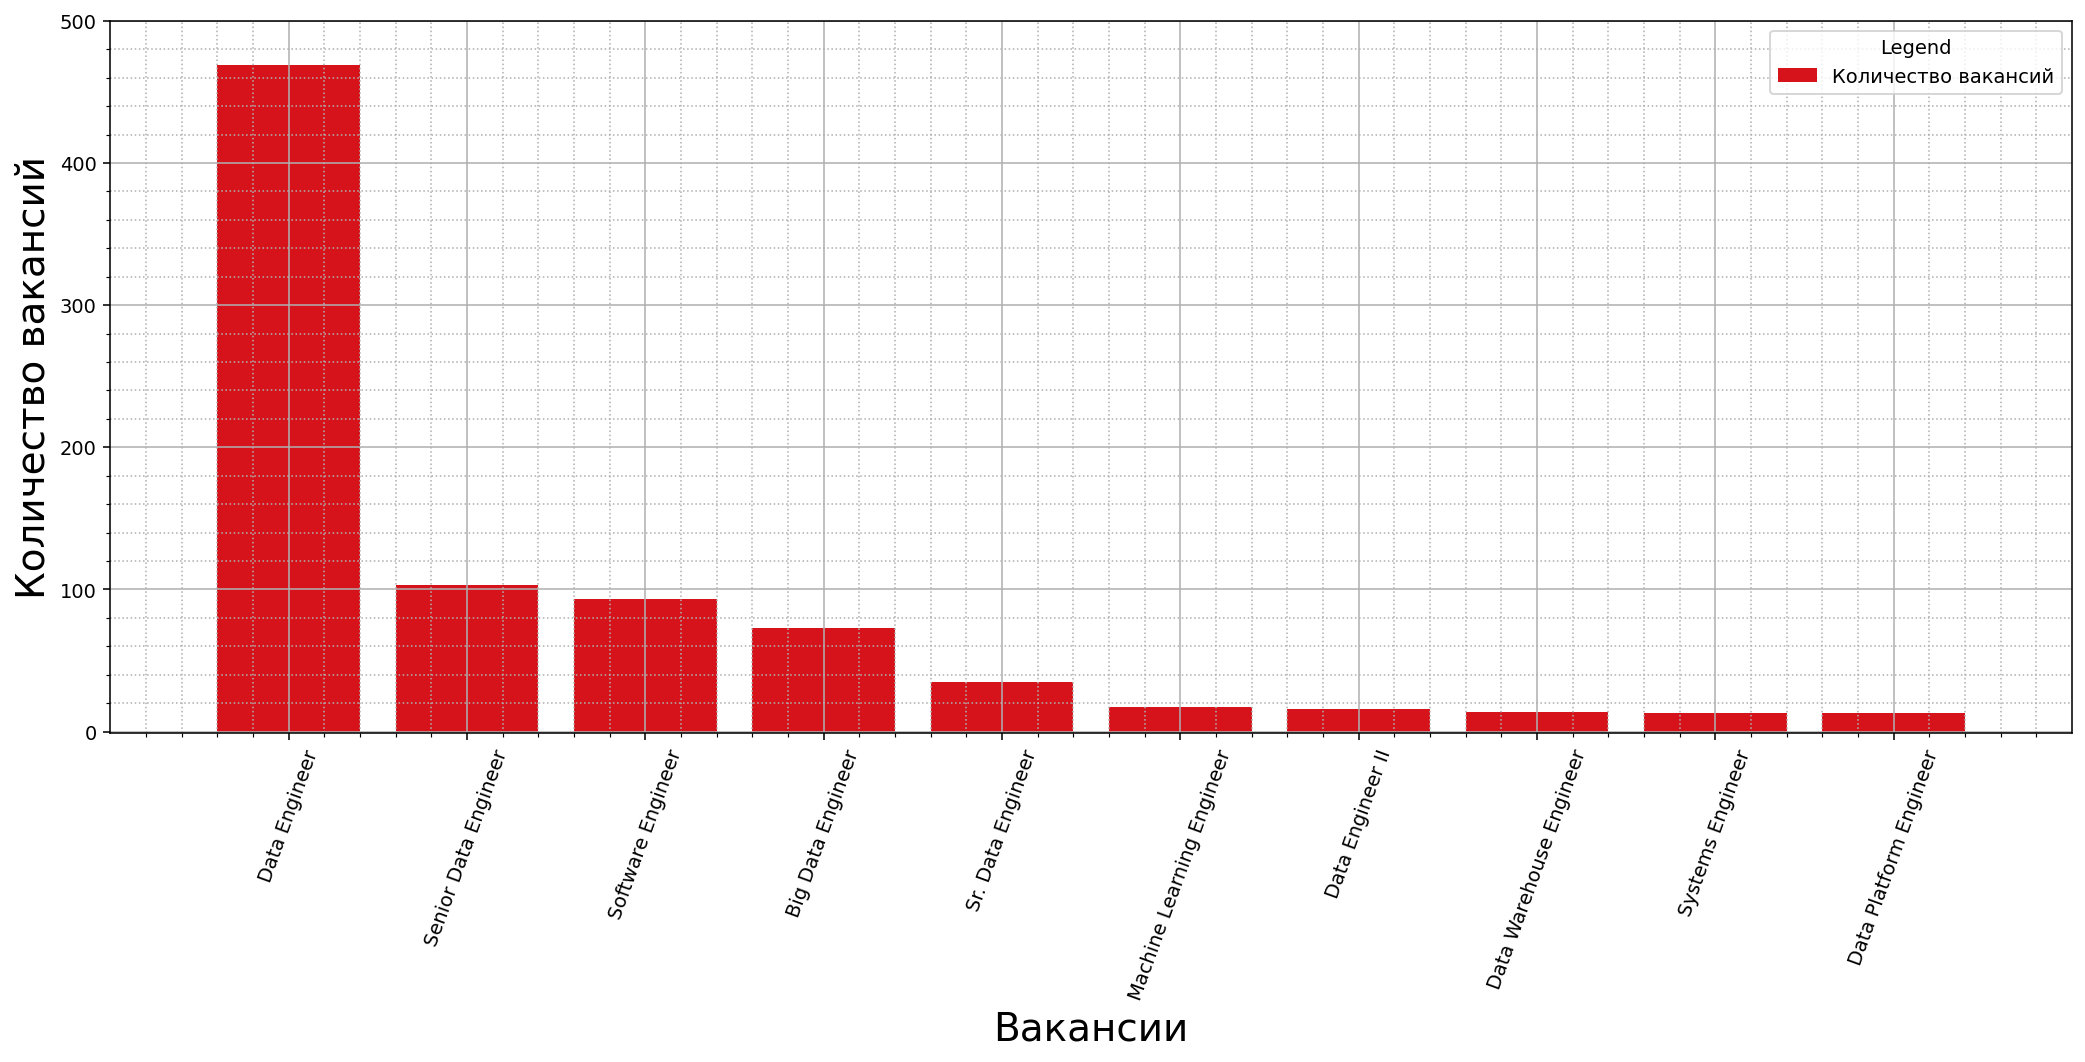

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(Jt['Имя компании'],Jt['Вакансии'],color='#D6121A')

plt.ylabel('Количество вакансий',fontsize=20)
plt.xlabel('Вакансии',fontsize=20)

legend = plt.legend(['Количество вакансий'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([-1., 10.])
plt.ylim([-1., 500.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()
plt.tick_params(axis='x', rotation=70)
plt.show()

# Построим график Топ 10 самых популярных местоположений вакансий по их численности и построим круговую диаграмму

**Таблица Топ 10**

In [ ]:
Ln = df['Локация'].value_counts().rename_axis('Локация').reset_index(name='Вакансий')[:10]

In [ ]:
Ln

,Локация,Вакансий
0,"Houston, TX",199
1,"Austin, TX",199
2,"San Diego, CA",195
3,"Chicago, IL",192
4,"San Antonio, TX",190
5,"New York, NY",187
6,"Philadelphia, PA",135
7,"Jacksonville, FL",122
8,"Phoenix, AZ",117
9,"Irving, TX",106


**График**

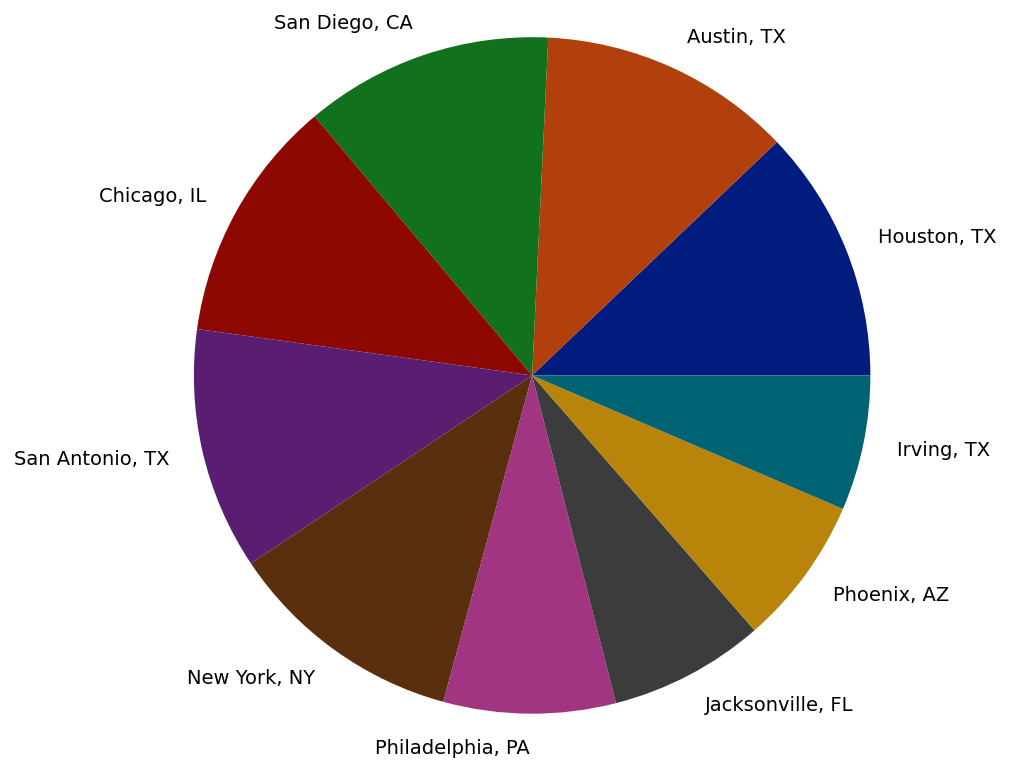

In [ ]:
 plt.pie(Ln['Вакансий'], labels=Ln['Локация'], colors=sns.color_palette('dark'), radius=2)
plt.show()

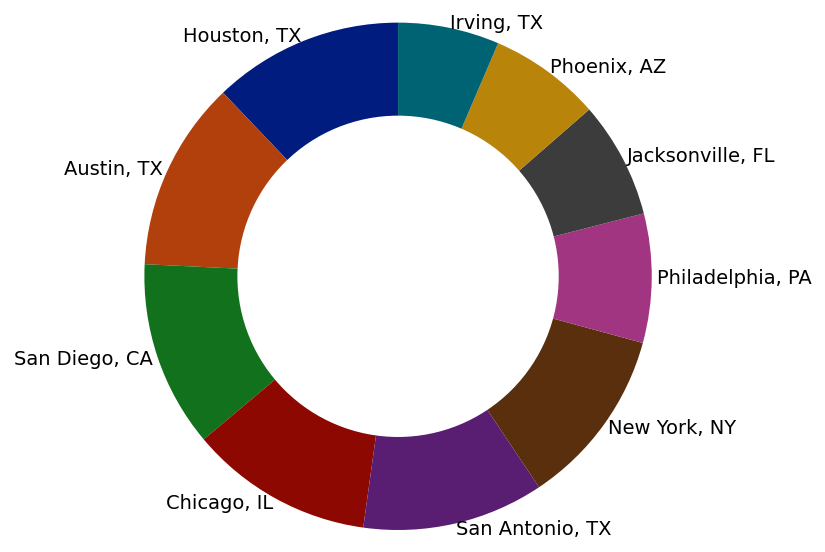

In [ ]:
 plt.pie(Ln['Вакансий'], labels=Ln['Локация'], colors=sns.color_palette('dark'),shadow=False, labeldistance=1.02, startangle=90, center=(0, 0), radius=1.5)

#Внутренний круг
centre_circle = plt.Circle((0, 0), 0.95, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



plt.show()

# Построим график популярности по колонке Type of ownership, относительно численности вакансий

**Таблица Топ 10**

In [ ]:
Tow = df['Тип собственности'].value_counts().rename_axis('Тип собственности').reset_index(name='Вакансий')[:10]

In [ ]:
Tow.loc[(Tow["Тип собственности"] == "-1"), "Тип собственности"] = "Unknown"

In [ ]:
Tow

,Тип собственности,Вакансий
0,Company - Private,1392
1,Company - Public,754
2,Subsidiary or Business Segment,126
3,Unknown,119
4,Nonprofit Organization,48
5,Unknown,30
6,Government,21
7,College / University,13
8,Contract,10
9,Private Practice / Firm,6


**График**

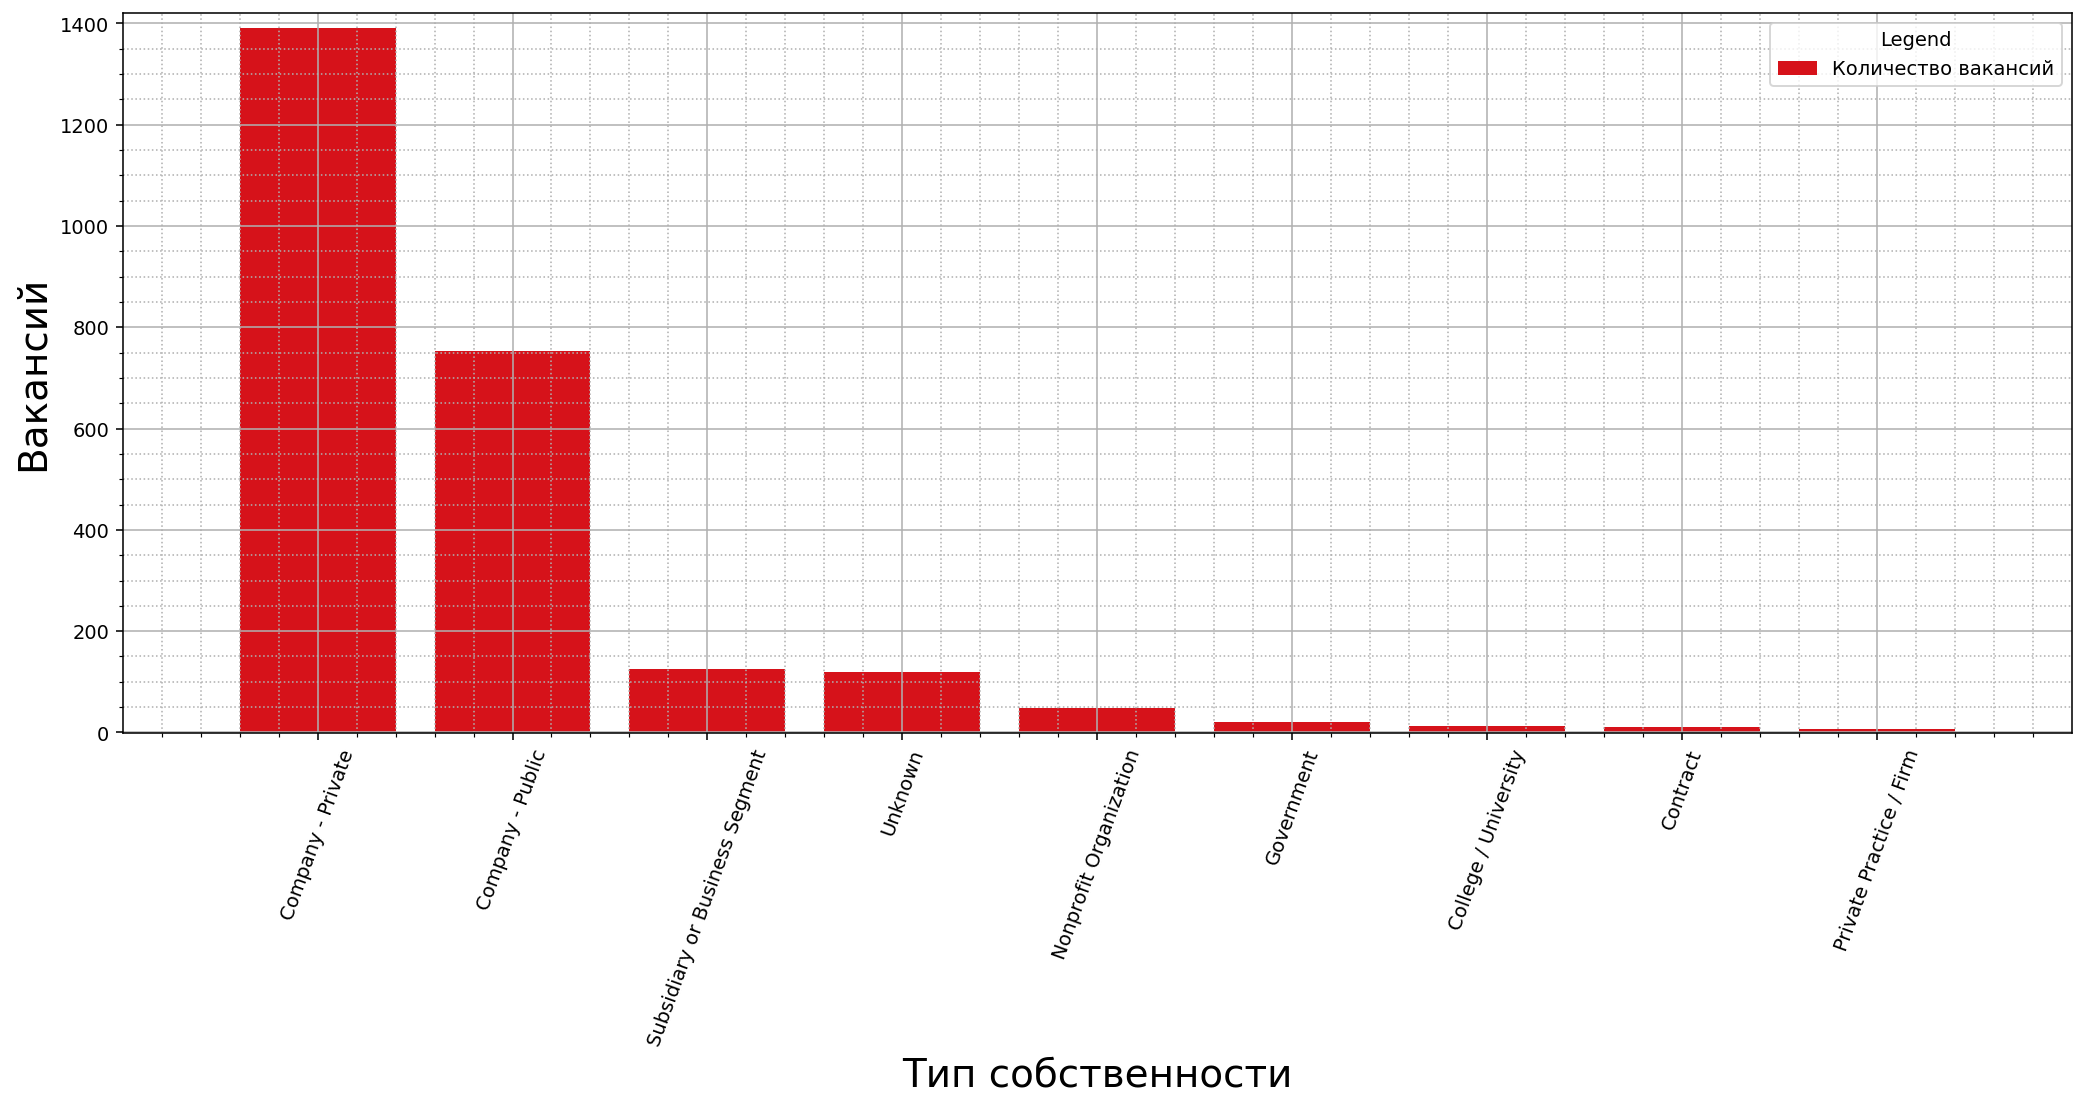

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(Tow['Тип собственности'],Tow['Вакансий'],color='#D6121A')

plt.xlabel('Тип собственности',fontsize=20)
plt.ylabel('Вакансий',fontsize=20)

legend = plt.legend(['Количество вакансий'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([-1., 9.])
plt.ylim([-1., 1420.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()
plt.tick_params(axis='x', rotation=70)
plt.show()

# Построим график популярности по секторам работы

**Таблица Топ 10**

In [ ]:
St = df['Сектор компании'].value_counts().rename_axis('Сектор компании').reset_index(name='Вакансий')[:10]

In [ ]:
St.loc[(St["Сектор компании"] == "-1"), "Сектор компании"] = "Unknown"

In [ ]:
St

,Сектор компании,Вакансий
0,Information Technology,890
1,Business Services,416
2,Unknown,375
3,Finance,177
4,Aerospace & Defense,94
5,Manufacturing,93
6,Insurance,82
7,Media,52
8,Health Care,51
9,"Oil, Gas, Energy & Utilities",37


**График**

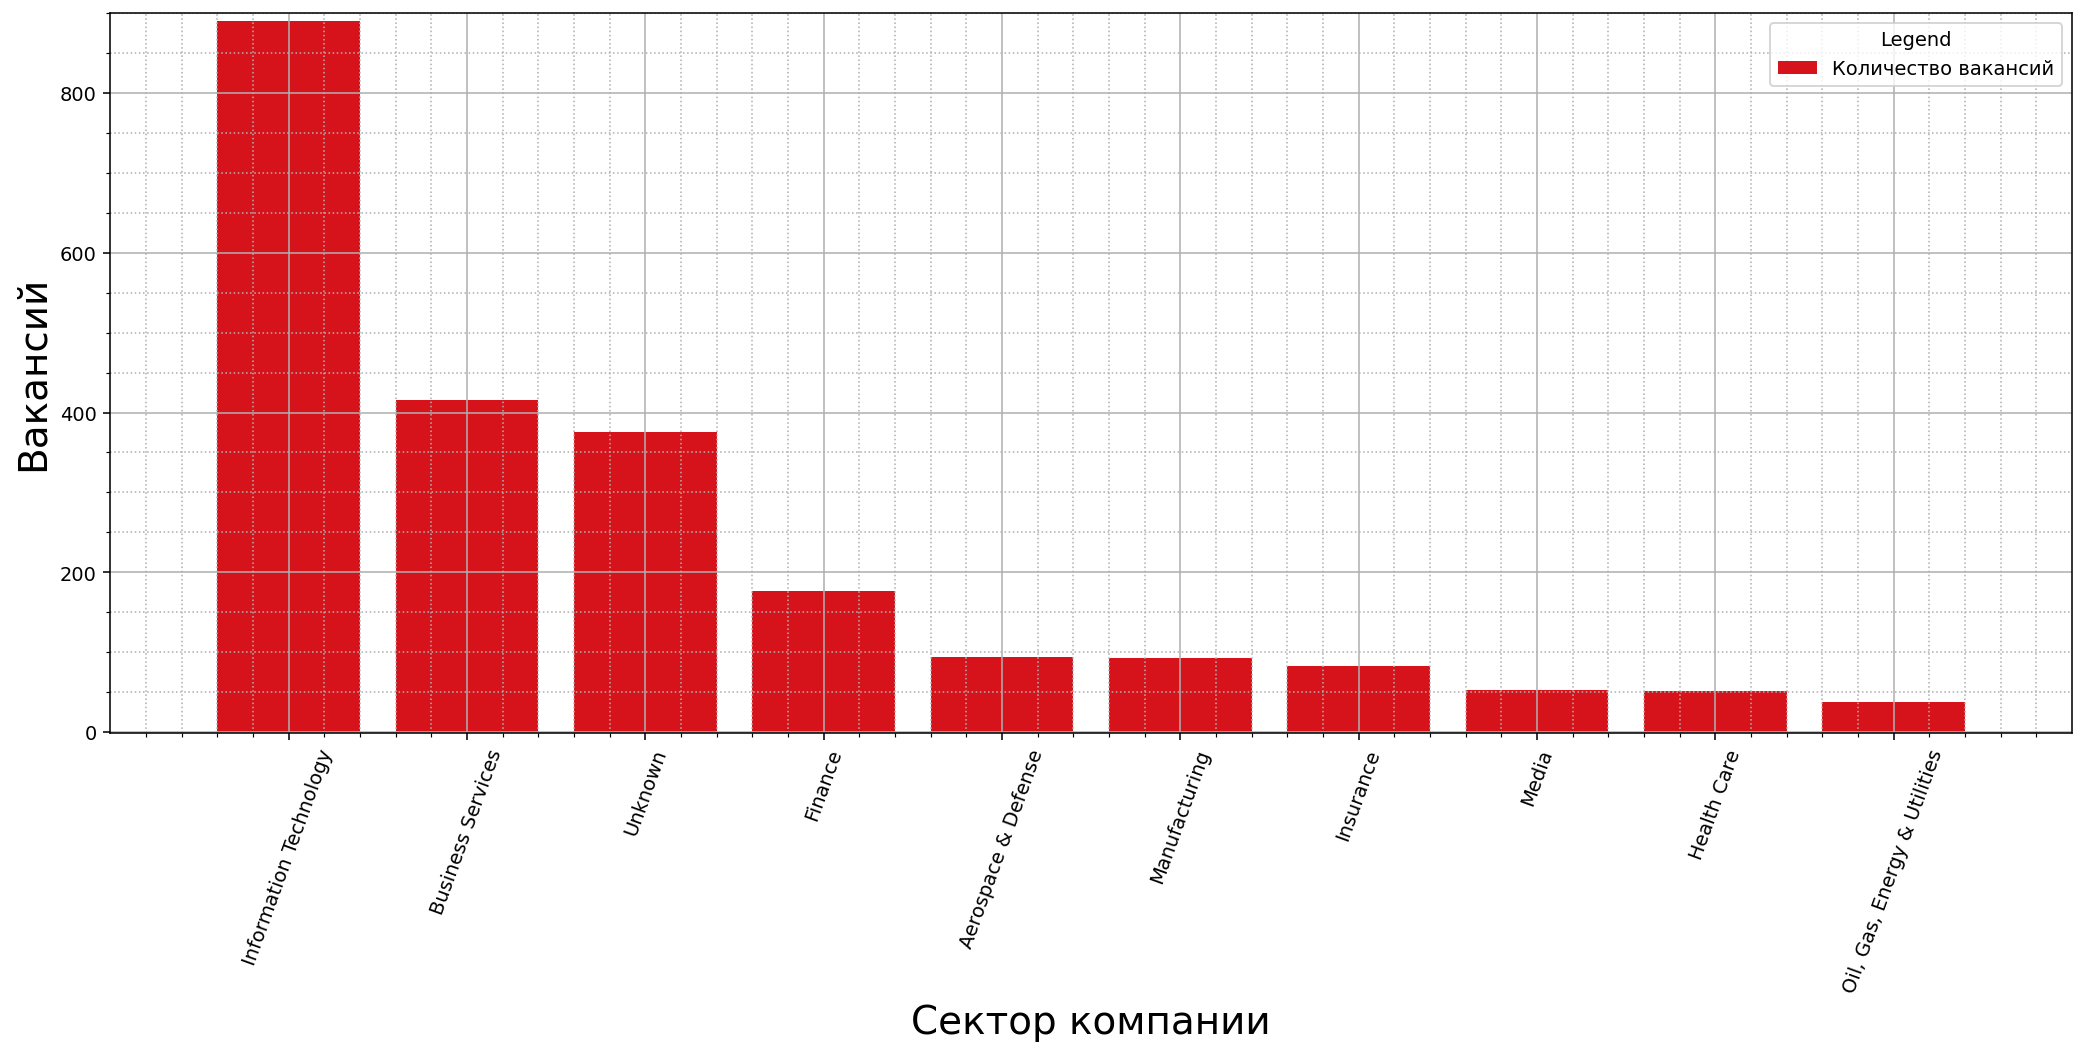

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(St['Сектор компании'],St['Вакансий'],color='#D6121A')

plt.xlabel('Сектор компании',fontsize=20)
plt.ylabel('Вакансий',fontsize=20)

legend = plt.legend(['Количество вакансий'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([-1., 10.])
plt.ylim([-1., 900.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()
plt.tick_params(axis='x', rotation=70)
plt.show()

# Построим график используя сектора работы и средний уровень зарплат в них

In [ ]:
df["Средняя зарплата"] = df.apply(
    lambda x: (
        int(x["Зарплата"].replace("(Glassdoor est.)", "")\
            .replace("(Employer est.)", "")\
            .replace("$", "")\
            .replace("K", "")\
            .split("-")[0]) + 
        int(x["Зарплата"]\
            .replace("(Glassdoor est.)", "")\
            .replace("(Employer est.)", "")\
            .replace("$", "")\
            .replace("K", "")\
            .split("-")[1])
        ) / 2, axis=1
    )
df

,Вакансия,Зарплата,Описание работы,Рейтинг,Имя компании,Локация,Локация Штаб квартиры,Размер компании,Год основания компании,Тип собственности,Отрасль компании,Сектор компании,Доход компании,Конкуренты компании,Льготы,Средняя зарплата
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,115.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,115.0
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,115.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,115.0
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1,102.0
2524,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1,102.0
2525,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,102.0
2526,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1,102.0


In [ ]:
Sec = df[['Сектор компании', 'Средняя зарплата']]

In [ ]:
Sec.loc[(Sec["Сектор компании"] == "-1"), "Сектор компании"] = "Unknown"

In [ ]:
Sec

,Сектор компании,Средняя зарплата
0,Business Services,115.0
1,Information Technology,115.0
2,Information Technology,115.0
3,Finance,115.0
4,Insurance,115.0
...,...,...
2523,Information Technology,102.0
2524,Business Services,102.0
2525,Information Technology,102.0
2526,Unknown,102.0


In [ ]:
Sec2=Sec.groupby(['Сектор компании']).agg(['mean','count'])['Средняя зарплата'][:10]

In [ ]:
Sec3=Sec2.sort_values(by = 'mean') 
Sec3

,mean,count
Сектор компании,,
Agriculture & Forestry,66.000000,1
"Construction, Repair & Maintenance",85.642857,7
Aerospace & Defense,90.867021,94
Business Services,97.405048,416
Finance,97.830508,177
Consumer Services,99.269231,13
"Arts, Entertainment & Recreation",99.900000,5
Education,102.375000,28
Accounting & Legal,106.259259,27


По итогу мы видим сектор Biotech & Pharmaceuticals имеет самую высокую среднюю зарплату 112K, а сектор Agriculture & Forestry почти в 2 раза меньше всего 66K

График

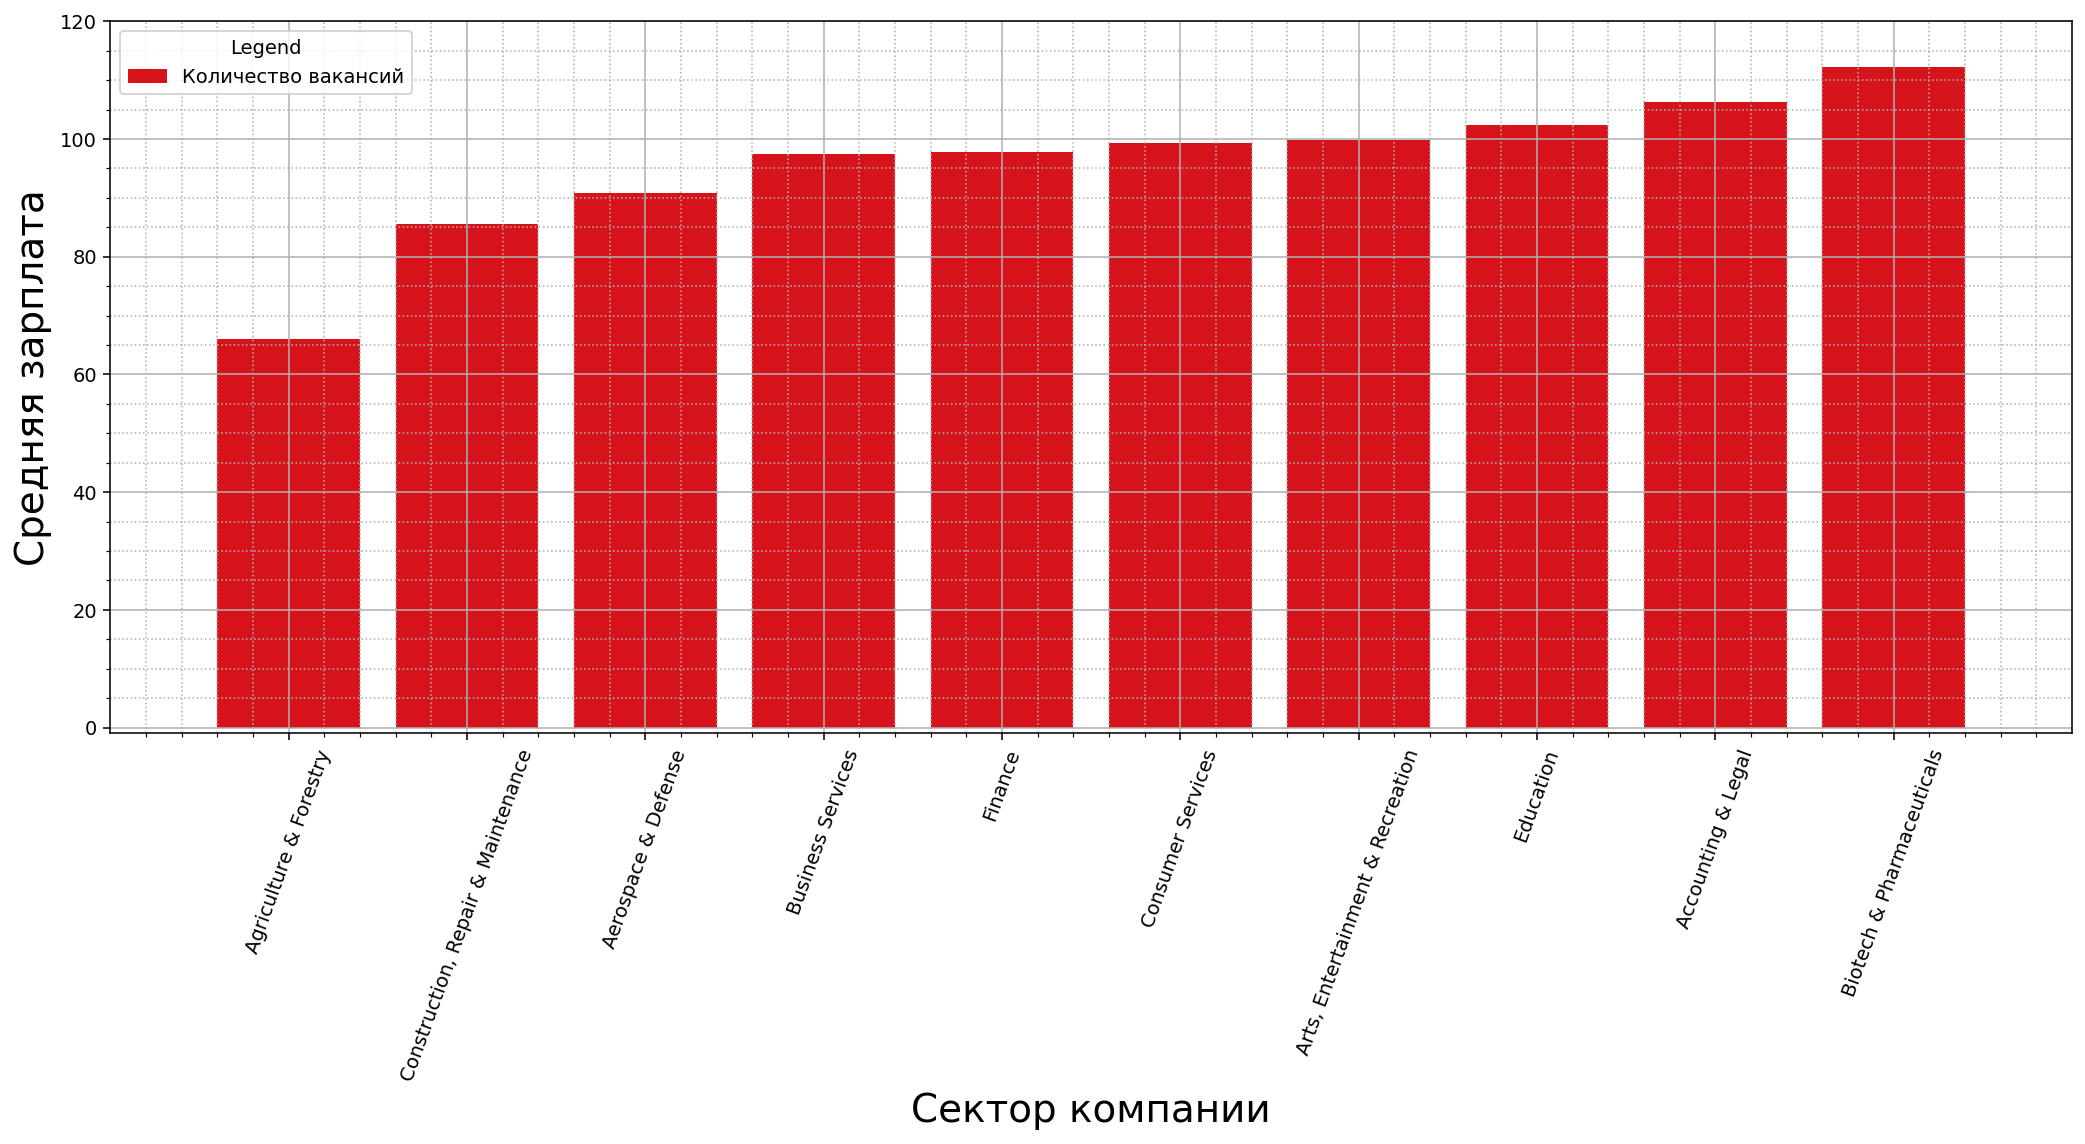

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(Sec3.index, Sec3['mean'],color='#D6121A')

plt.xlabel('Сектор компании',fontsize=20)
plt.ylabel('Средняя зарплата',fontsize=20)

legend = plt.legend(['Количество вакансий'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([-1., 10.])
plt.ylim([-1., 120.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()
plt.tick_params(axis='x', rotation=70)
plt.show()

# Построим гистограмму распределения рейтинга компаний

In [ ]:
Rei = df[['Сектор компании', 'Рейтинг']]

In [ ]:
Rei.loc[(Rei["Сектор компании"] == "-1"), "Сектор компании"] = "Unknown"

In [ ]:
Rei2=Rei.groupby(['Сектор компании']).agg(['mean','count'])['Рейтинг'][:10]

In [ ]:
Rei3=Rei2.sort_values(by = 'mean', ascending=False)
Rei3

,mean,count
Сектор компании,,
Agriculture & Forestry,4.900000,1
Education,3.864286,28
Accounting & Legal,3.785185,27
Biotech & Pharmaceuticals,3.722857,35
Aerospace & Defense,3.710638,94
Finance,3.691525,177
Business Services,3.665625,416
"Construction, Repair & Maintenance",3.500000,7
"Arts, Entertainment & Recreation",3.340000,5


In [ ]:
График

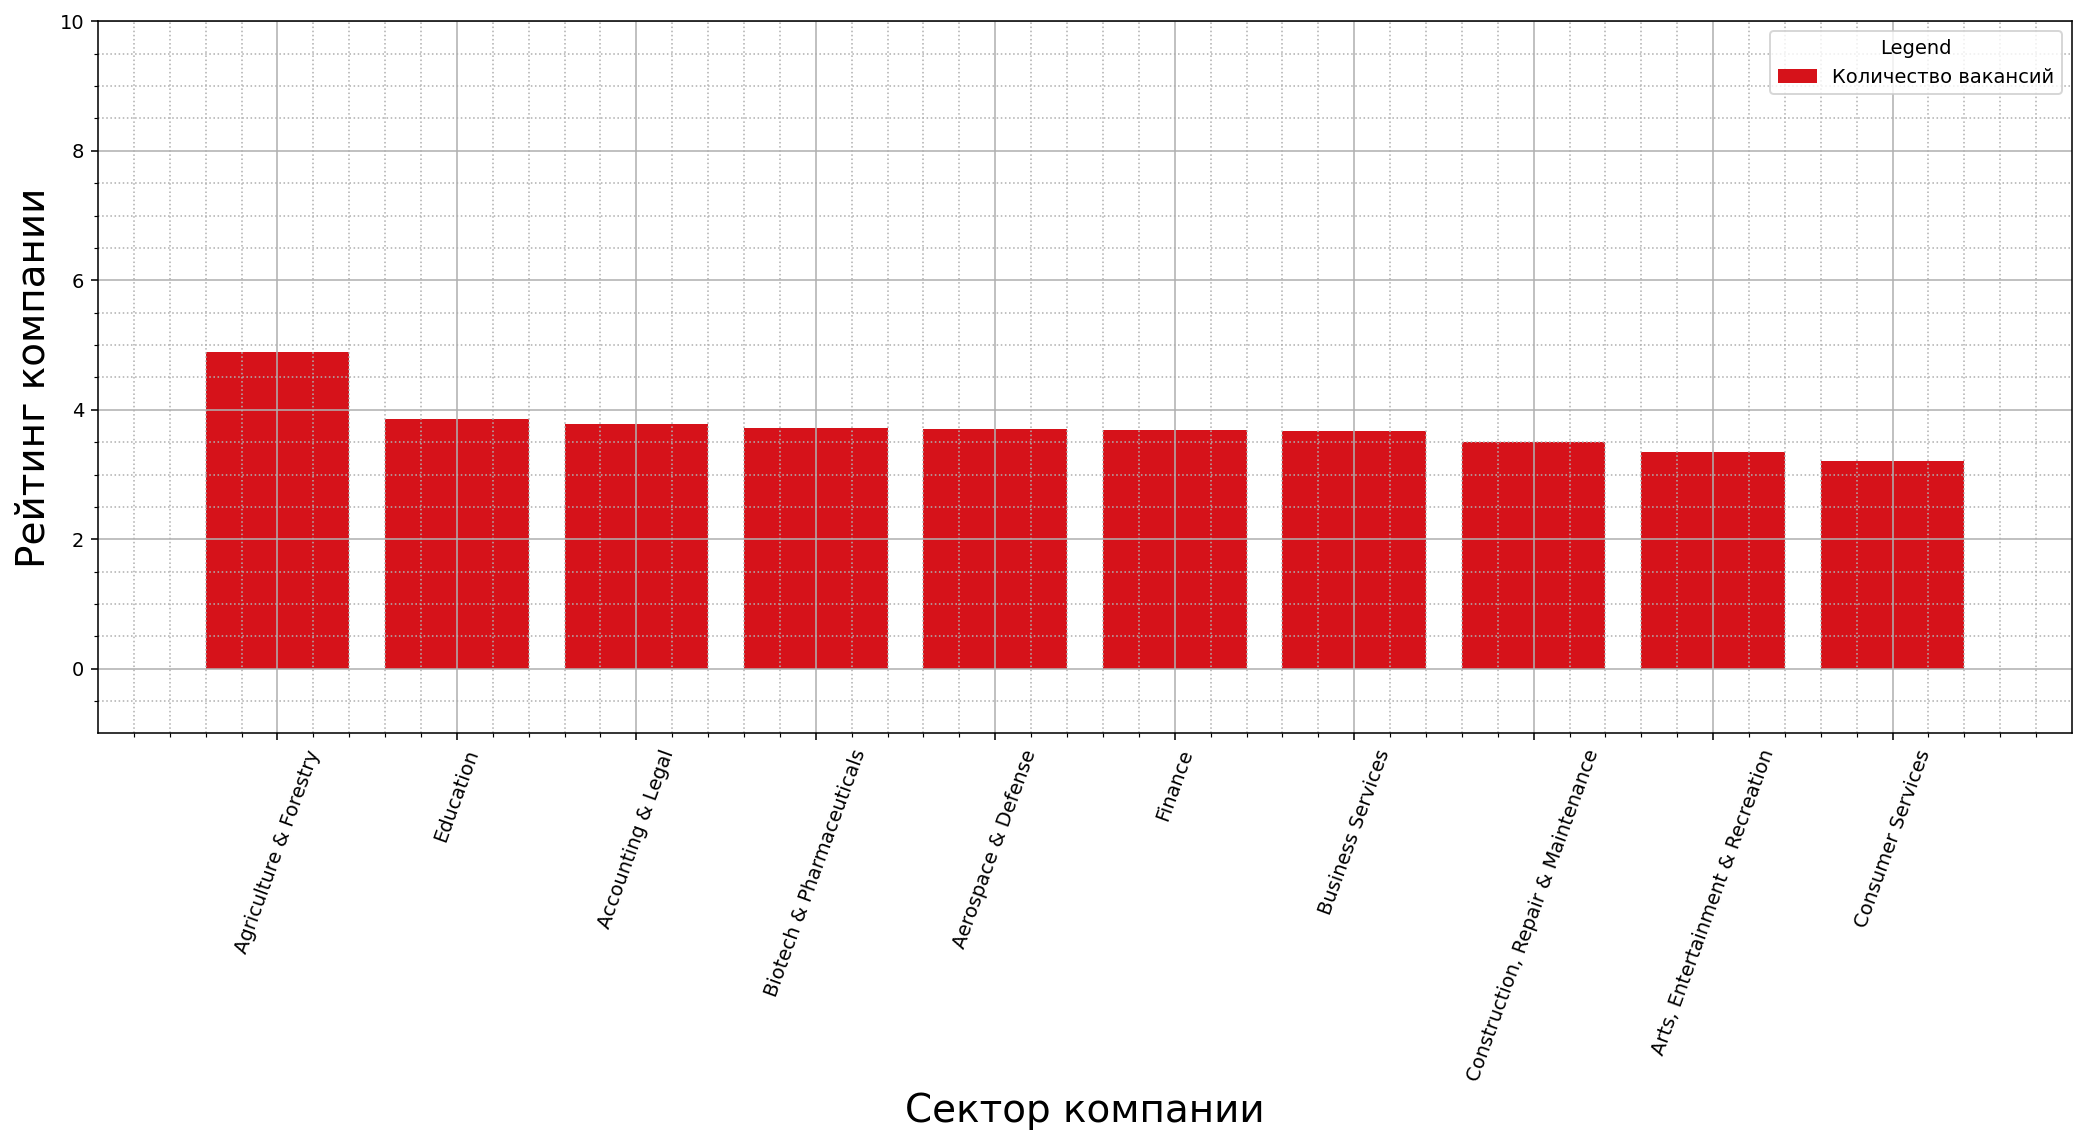

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(Rei3.index, Rei3['mean'],color='#D6121A')

plt.xlabel('Сектор компании',fontsize=20)
plt.ylabel('Рейтинг компании',fontsize=20)

legend = plt.legend(['Количество вакансий'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([-1., 10.])
plt.ylim([-1., 10.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()
plt.tick_params(axis='x', rotation=70)
plt.show()

# Построим график средних зарплат по популярным компаниям

In [ ]:
Com= df.groupby(['Имя компании','Рейтинг','Средняя зарплата'], as_index=False)['Рейтинг'].count()[:10]

In [ ]:
Com

,Имя компании,Средняя зарплата,Рейтинг
0,12traits,158.0,1
1,"1819, LLC",79.0,1
2,22nd Century Staffing,91.5,1
3,22nd Century Technologies,40.5,1
4,22nd Century Technologies,87.0,1
5,22nd Century Technologies,97.0,1
6,4C Insights,69.5,1
7,7 KINGS CODE,60.5,1
8,"7-Eleven, Inc.",61.0,1
9,7Park Data,115.0,1


In [ ]:
Com2=Com.sort_values(by = 'Средняя зарплата', ascending=False)[:10]

In [ ]:
Com2

,Имя компании,Средняя зарплата,Рейтинг
0,12traits,158.0,1
9,7Park Data,115.0,1
5,22nd Century Technologies,97.0,1
2,22nd Century Staffing,91.5,1
4,22nd Century Technologies,87.0,1
1,"1819, LLC",79.0,1
6,4C Insights,69.5,1
8,"7-Eleven, Inc.",61.0,1
7,7 KINGS CODE,60.5,1
3,22nd Century Technologies,40.5,1


График

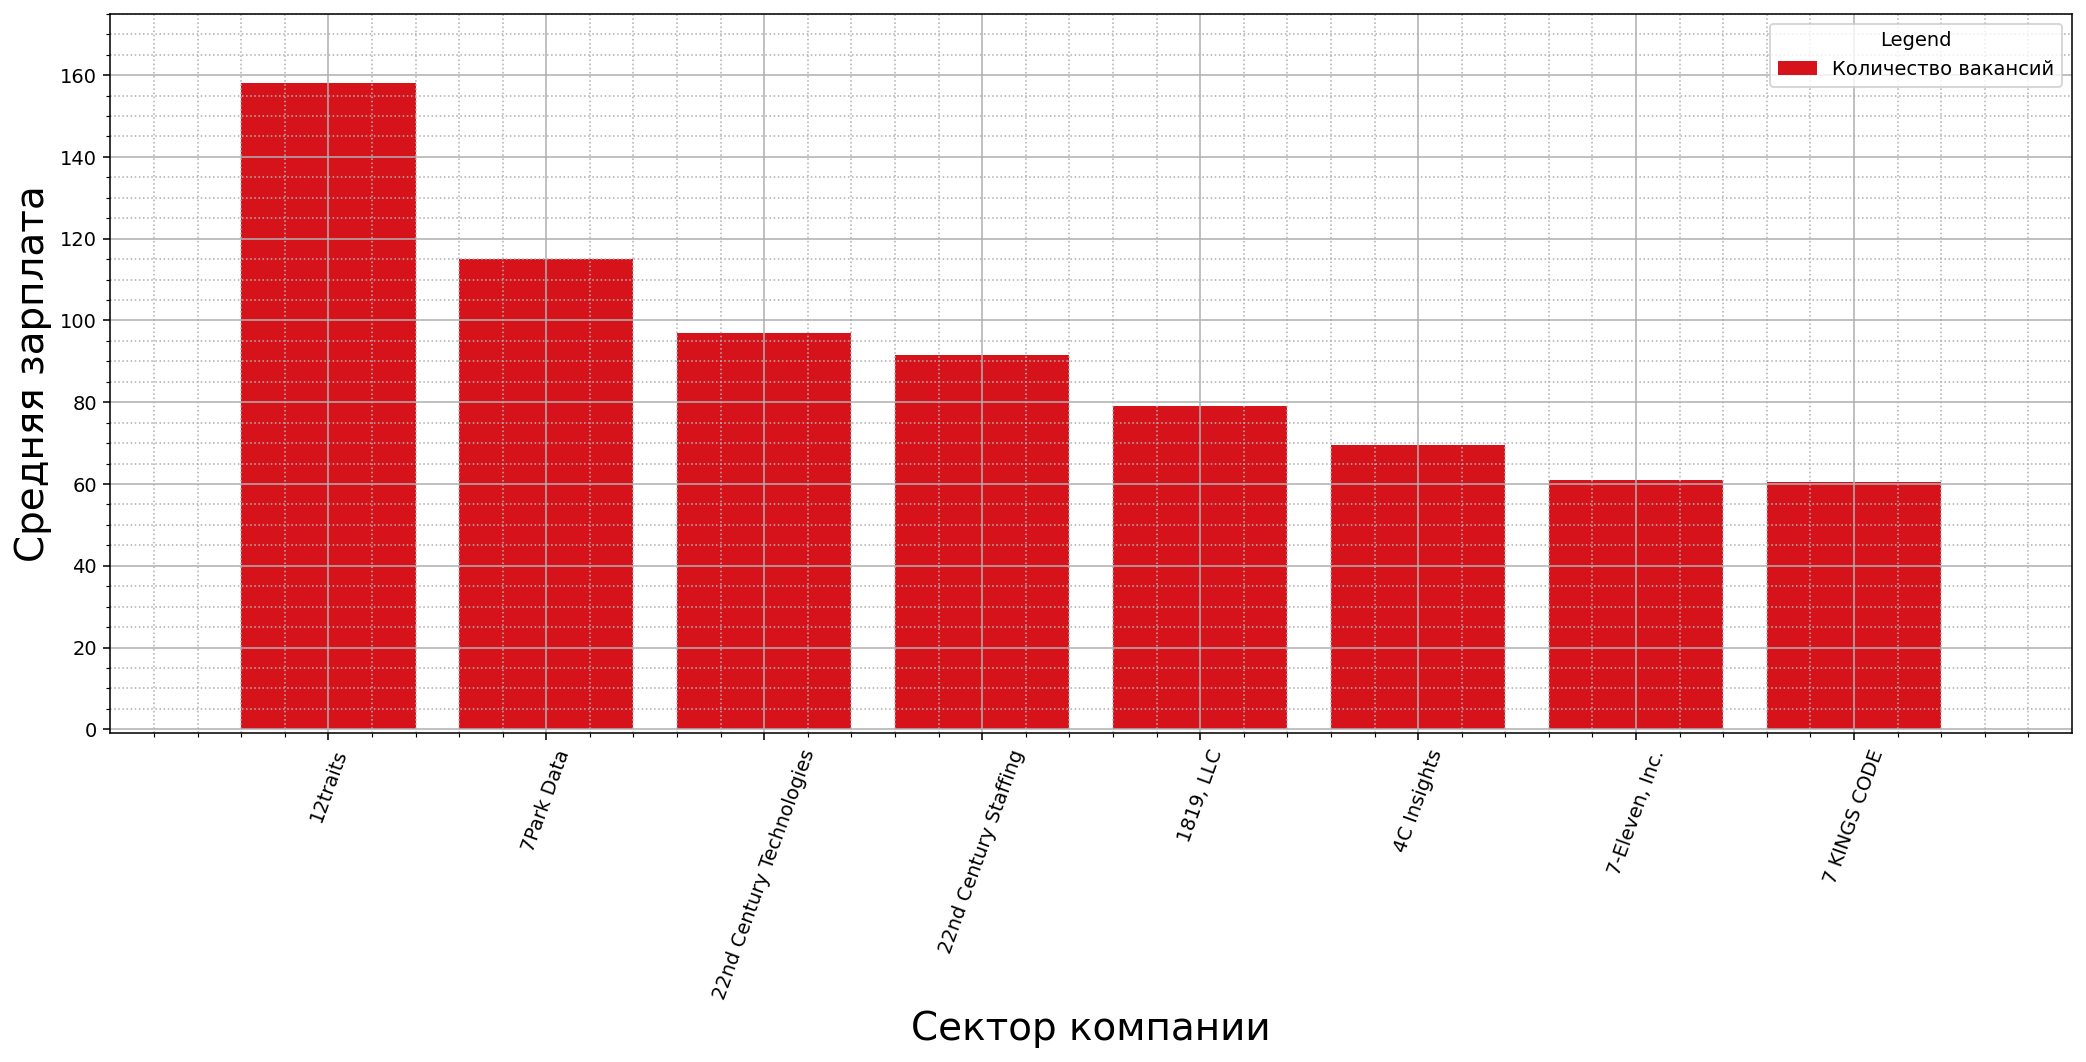

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(Com2['Имя компании'], Com2['Средняя зарплата'],color='#D6121A')

plt.xlabel('Сектор компании',fontsize=20)
plt.ylabel('Средняя зарплата',fontsize=20)

legend = plt.legend(['Количество вакансий'], title = "Legend")

#Дополнительные отметки на осях
plt.minorticks_on()
plt.xlim([-1., 8.])
plt.ylim([-1., 175.])

plt.grid(which='major') #основная сетка

plt.grid(which='minor', linestyle=':') #дополнительная сетка
plt.tight_layout()
plt.tick_params(axis='x', rotation=70)
plt.show()

# Построим по описанию вакансий облако тегов, исследовать самые популярные слова

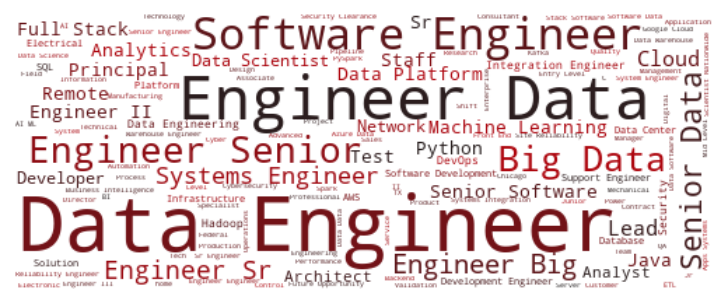

In [ ]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['Вакансия'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()